Considere uma câmera representada pelos eixos coordenados abaixo.
Note que o eixo Z, o qual representa o eixo óptico da câmera está apontado para cima.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [2]:
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)



Crie suas funções de translação e rotação nos três eixos.

In [3]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point =np.array([[0],[0],[0],[1]])

cam = np.hstack((base,point))

print ('Origin: \n',point)

print ('cam: \n',cam)


Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
cam: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

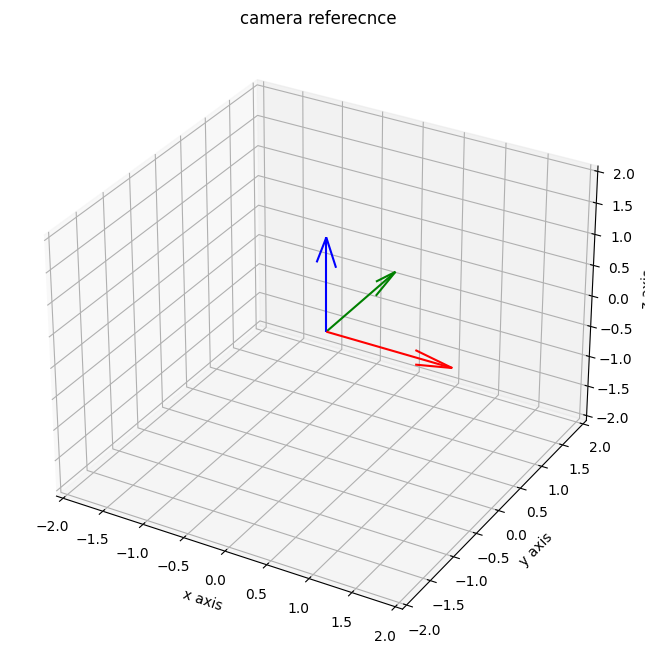

In [4]:
ax0 = set_plot()
draw_arrows(point,base,ax0)

Execute as transformações necessárias para posicionar o eixo óptico da câmera na horizontal (eixo Z), tendo o eixo Y apontando para baixo e o eixo X para a direita (sem alteração da orientação atual). Além disso, posicione essa câmera no ponto (2,7,3).

Faça o seu código abaixo.

In [5]:
# Faça as transformações

# Imprima o valor da camera original e camera transformada


Vamos agora plotar o seu resultado.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

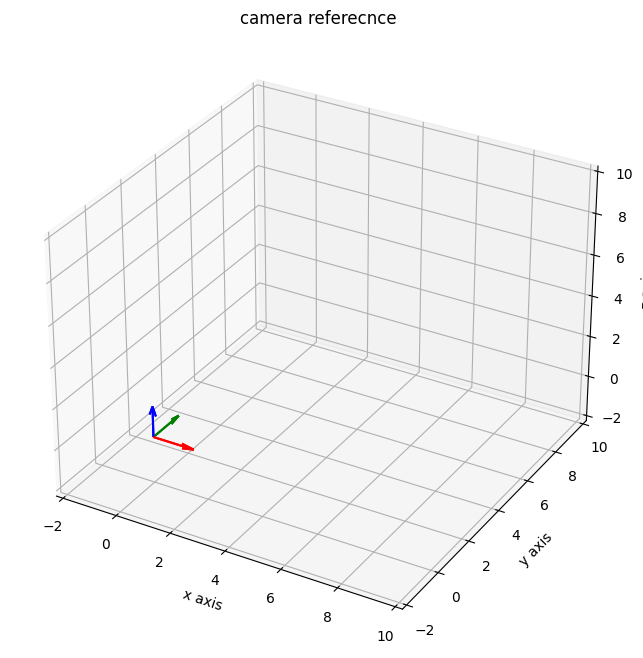

In [6]:
ax0 = set_plot(lim=[-2,10])
draw_arrows(point,base,ax0)
draw_arrows(cam[:,-1],cam[:,0:3],ax0)

Agora vamos incluir um objeto na cena. Vamos usar a casa que já apresentamos no material das aulas de python.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

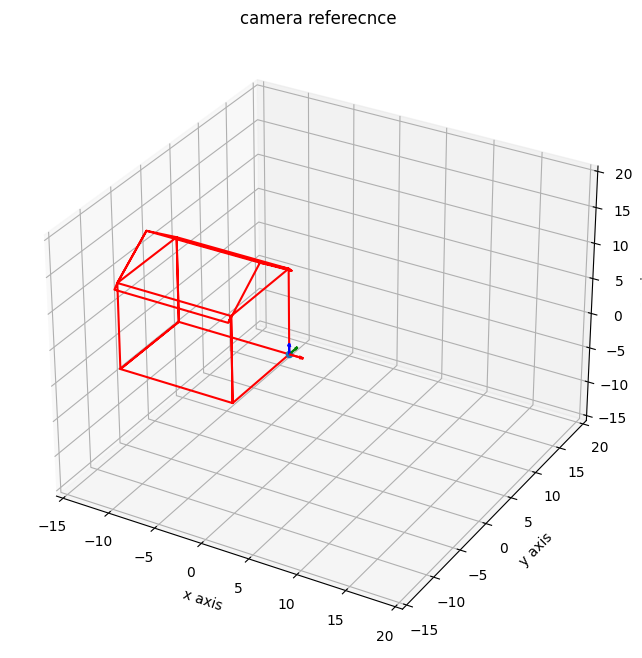

In [7]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)

#add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')


# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)


Agora você deverá rotacionar a casa de -30 graus em torno do eixo Z e posicioná-la de tal forma que sua quina (0,0,0) ficará em (3, 20, 2).

Faça o seu código aqui.

Agora vamos plotar a câmera e a casa no mesmo gráfico.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

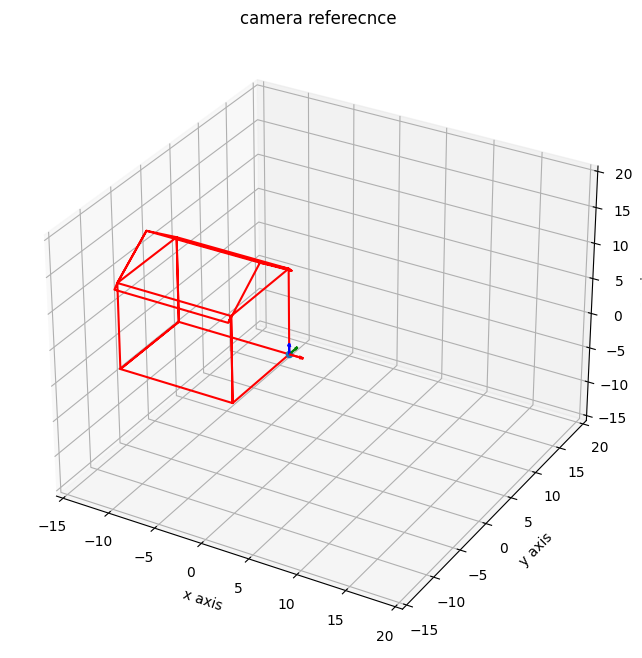

In [8]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,3],cam[:,0:3],ax0)

Calcule qual o valor das coordenadas da quina da casa no referencial da câmera. Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".

In [9]:
# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente:
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo




Imagine agora que você deverá rotacionar a sua câmera em torno do seu eixo Y (que está na vertical) de 45 graus e depois incliná-la de -15 graus em torno do eixo X (que está na horizontal), mas sem tirá-la da posição onde ela se encontra.
Faça seu código abaixo.

In [10]:
# Dica: Faça uma rotação de cada vez e plote o resultado em cada caso para você ter certeza de que está correto



Vamos agora plotar o seu resultado.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

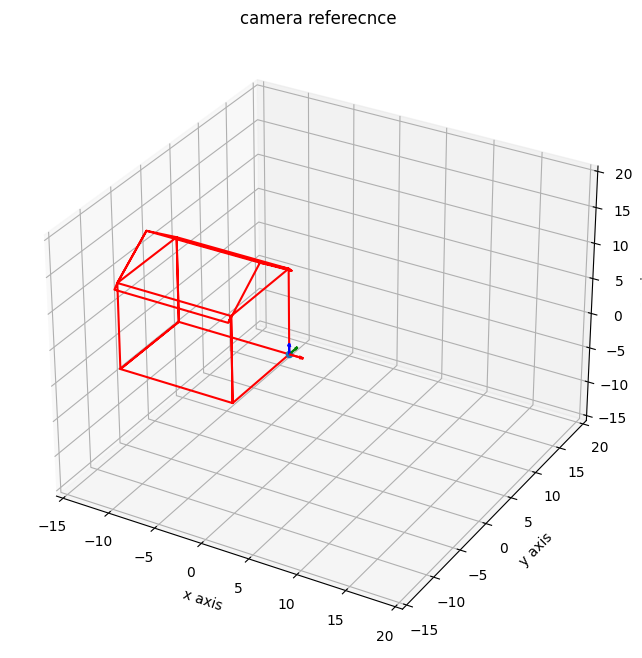

In [11]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)


Calcule novamente qual o valor das coordenadas da quina da casa no referencial da câmera. Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".

In [12]:
# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente:
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo



Vamos agora transladar a câmera de 5 unidades na direção de seu eixo Z. Faça o seu código abaixo.

In [13]:
# Lembre-se que é preciso levar a câmera para a origem antes de realizar a
# transformação que ocorrerá no próprio eixo da câmera


Vamos plotar mais uma vez a casa e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

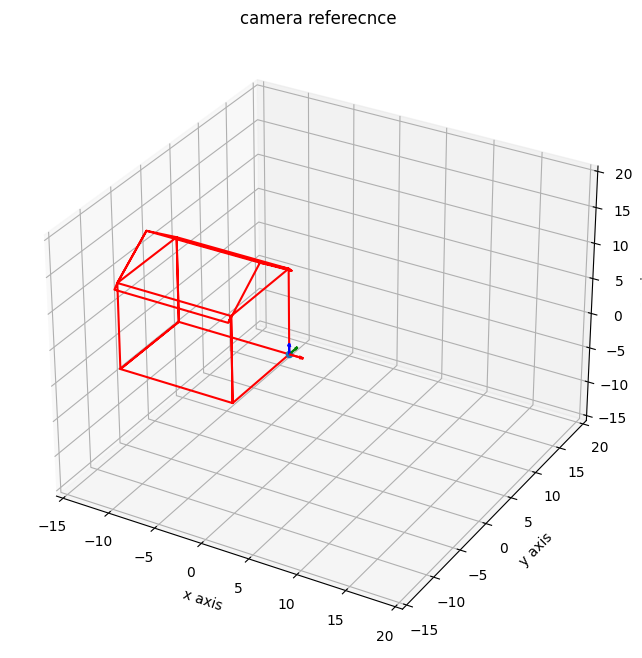

In [14]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)

Por fim, vamos transladar a câmera no referencial do mundo de -10 unidades no eixo Z. Faça seu código abaixo.

E plotar mais uma vez o seu resultado, mostrando a casa, o referencial original e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

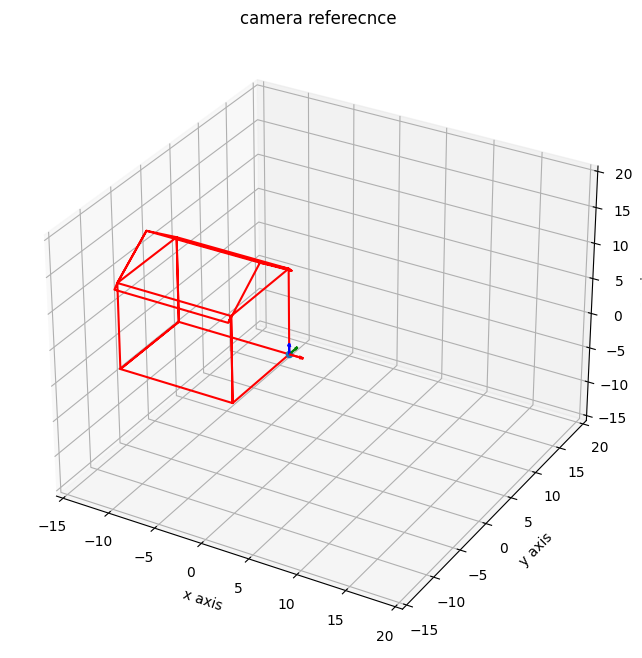

In [15]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)